In [6]:
## Importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [7]:
## Data Cleaning
# Get energy dummy
sample_data = pd.read_csv('../EXAM/data/cleaned_data.csv',encoding='utf-16')
df = pd.DataFrame(sample_data)
df['energy'] = df['energy'].str.replace('Energimærke ', '')
df['energy'] = df['energy'].str.replace('A2015','A')
df['energy'] = df['energy'].str.replace('A2020','A')
dummy_energy = pd.get_dummies(df['energy'])
df = pd.concat([df,dummy_energy],axis=1)

# Change constructing year to construction age

df['age'] = 2023 - df['year']

df


,price,address,city,type,saledays,energy,living_space,ground_space,rooms,owner_expenses,...,Villa,Villa/Fritidsbolig,A,B,C,D,E,F,G,age
0,4890000,Stengårdsvænge 85,Københavns omegn,Villa,0.0,C,81,301,4.0,3614.0,...,1,0,0,0,1,0,0,0,0,68.0
1,695000,"Vestergade 4, 2. tv.",Sydjylland,Ejerlejlighed,127.0,C,90,304,3.0,1198.0,...,0,0,0,0,1,0,0,0,0,123.0
2,4998000,Horns Rev 27,Sydjylland,Villa,0.0,E,151,4714,5.0,5464.0,...,1,0,0,0,0,0,1,0,0,38.0
3,2995000,Nøddehøj 226,Nordsjælland,Rækkehus,0.0,B,90,211,3.0,2902.0,...,0,0,0,1,0,0,0,0,0,30.0
4,10950000,Skovbakkevej 24,Nordjylland,Villa,0.0,D,248,926,6.0,5710.0,...,1,0,0,0,0,1,0,0,0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,4295000,Dalgasgade 5,Vestjylland,Villa,3.0,C,220,655,6.0,2548.0,...,1,0,0,0,1,0,0,0,0,99.0
432,849000,Suhrs Gade 15,Vest- og Sydsjælland,Villa/Fritidsbolig,3.0,C,170,552,7.0,1850.0,...,0,1,0,0,1,0,0,0,0,98.0
433,1250000,Borgergade 89,Vest- og Sydsjælland,Villa,3.0,F,132,892,4.0,2598.0,...,1,0,0,0,0,0,0,1,0,45.0
434,1775000,Polarvej 2,Sydjylland,Villa,3.0,C,120,1621,3.0,2904.0,...,1,0,0,0,1,0,0,0,0,37.0


In [8]:
## Dataset split
columns_to_drop = ['price','address','city','type','energy', 'year','area_name']
X,y = df.drop(columns_to_drop,axis=1),df.price
test_size = 0.30 # taking 70:30 training and test set
seed = 17082023 # Random number seeding for repeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [9]:
## Main model
eta = 0.1
gradient_booster = HistGradientBoostingClassifier(learning_rate=eta)
# Gradient boosting classifiers are required to implement gradient boosting.
gradient_booster.fit(X_train,y_train)
y_test_predict = gradient_booster.predict(X_test)
print(classification_report(y_test,y_test_predict))
# Use the Python module named classification report to verify the correctness and quality of the accuracy report ().

              precision    recall  f1-score   support

      295000       0.00      0.00      0.00         0
      395000       0.00      0.00      0.00         1
      430000       0.00      0.00      0.00         0
      495000       0.00      0.00      0.00         1
      550000       0.00      0.00      0.00         0
      625000       0.00      0.00      0.00         1
      795000       0.00      0.00      0.00         1
      798000       0.00      0.00      0.00         1
      825000       0.00      0.00      0.00         1
      849000       0.00      0.00      0.00         1
      895000       0.00      0.00      0.00         0
      975000       0.00      0.00      0.00         0
      995000       0.00      0.00      0.00         1
      998000       0.00      0.00      0.00         0
     1085000       0.00      0.00      0.00         1
     1095000       0.00      0.00      0.00         2
     1098000       1.00      1.00      1.00         1
     1125000       0.00    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [10]:
## Lasso regularization
# Normal scaler
from sklearn.preprocessing import StandardScaler
norm_scaler = StandardScaler().fit(X_train)
X_train_std = norm_scaler.transform(X_train)
X_test_std = norm_scaler.transform(X_test)

# Lasso
from sklearn.linear_model import Lasso
output = []
lambdas = np.logspace(-4, 4, 20)
for lambda_ in lambdas:
    reg = Lasso(alpha=lambda_, random_state=1)
    reg.fit(X_train_std, y_train)
    output.append(
        [
            lambda_,
            mse(reg.predict(X_train_std), y_train,squared=False),
            mse(reg.predict(X_test_std), y_test,squared=False),
        ]
    )

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.748e+13, tolerance: 4.478e+11
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.748e+13, tolerance: 4.478e+11
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Minimum RMSE = 2430600.041 found for lambda = 10000.0000.


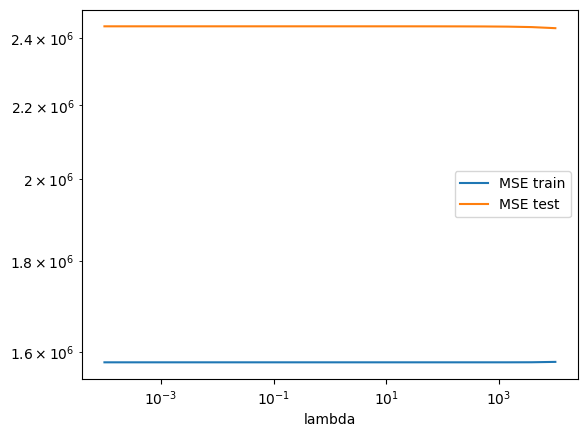

In [11]:
## Search for best lambda
MSE_df = pd.DataFrame(
    data=output, columns=["lambda", "MSE train", "MSE test"]
).set_index("lambda")

MSE_df.plot(logx=True, logy=True)

# find the minimal observations as a series
best_fit = MSE_df["MSE test"].nsmallest(1)

# take out the data minimum RMSE and the optimal lambda
lambda_opt, RMSE_min = next(best_fit.items())
print(f"Minimum RMSE = {RMSE_min:.3f} found for lambda = {lambda_opt:.4f}.")


In [12]:
## 5-fold cross validation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
# Pipeline
pipe_lasso = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler(),
    Lasso(random_state=1),
)

# Split X, y into development (2/3) and test data (1/3).
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=(1 / 3), random_state=1)

lambdas = np.logspace(-4, 4, 12)

kfolds = KFold(n_splits=5)
mses = []

for lambda_ in lambdas:

    pipe_lasso = make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        StandardScaler(),
        Lasso(alpha=lambda_, random_state=1),
    )
    mses_test = []
    mses_train = []

    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        X_train, y_train = X_dev.iloc[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev[val_idx]

        pipe_lasso.fit(X_train, y_train)

        mses_train.append(mse(pipe_lasso.predict(X_train), y_train))
        mses_test.append(mse(pipe_lasso.predict(X_val), y_val))

    mses.append([np.mean(mses_train), np.mean(mses_test), lambda_])

# Create df with MSE values
df_mses = pd.DataFrame(mses, columns=["MSE_train", "MSE_test", "lambda"])

# Index of the lambda that gives the lowest MSE_test in the dataframe
idx_optimal_lambda = df_mses.idxmin()["MSE_test"]
lambda_opt_test = df_mses.loc[idx_optimal_lambda]["lambda"]
opt_test_mse = df_mses.loc[idx_optimal_lambda]["MSE_test"]
print(
    f"Lowest test MSE equal to {opt_test_mse:.4f} is"
    f" achieved with lambda = {lambda_opt_test:.3f}."
)

KeyError: '[58, 61, 62, 65, 66, 67, 69, 73, 78, 80, 81, 82, 85, 89, 90, 91, 92, 93, 95, 98, 101, 102, 106, 107, 117, 119, 122, 127, 128, 132, 139, 146, 159, 161, 162, 164, 165, 168, 171, 172, 173, 174, 179, 180, 185, 186, 192, 197, 201, 204, 206, 207, 208, 213, 214, 218, 221, 224, 228, 229, 233, 242, 244, 246, 247, 249, 251, 256, 258, 260, 261, 267, 271, 273, 277, 283, 284, 285, 286, 289] not in index'

In [ ]:
## Root mean squared errors
# rmse_GBM = mse(y_test,y_test_predict,squared=False)
# rmse_GBM

In [ ]:
## R-squared
r2_GBM = r2_score(y_test,y_test_predict)
r2_GBM